# Interpreting ResNet Model With Smooth Gradients

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using Smooth Gradients algorithm, specifically the `SmoothGradInterpreter` class.

In [1]:
from PIL import Image
import paddle
import interpretdl as it
from interpretdl.data_processor.readers import read_image
from interpretdl.data_processor.visualizer import visualize_grayscale
from assets.resnet import ResNet50

If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [ ]:
# downloads and the model to assets/
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams -P assets/

Initialize `paddle_model` and load weights. `ResNet50` is borrowed from PaddleClas [architectures](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084/ppcls/modeling/architectures).

In [2]:
MODEL_PATH = "assets/ResNet50_pretrained.pdparams"
paddle_model = ResNet50()

state_dict = paddle.load(MODEL_PATH)
paddle_model.set_dict(state_dict)

Initialize the `SmoothGradInterpreter`. 

In [3]:
sg = it.SmoothGradInterpreter(paddle_model, use_cuda=True)

Before interpreting the image, we first take a look at the original image.

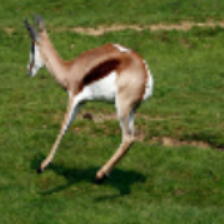

In [4]:
img_path = 'assets/deer.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let Smooth Gradients method help us `interpret` the image with respect to the predicted label. 

We choose noise amount to be 0.1, which means the added Gaussian noise has standard deviation of 0.1 * (x_max - x_min), where x_max and x_min are the maximum and minimum values of the processed image. 

Gradients are overlayed with the original image.

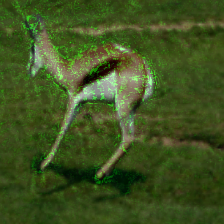

In [5]:
gradients = sg.interpret(
        img_path, 
        noise_amount=0.1,
        visual=True, 
        labels=None, 
        save_path=None)

Another option for visualization is in grayscale:

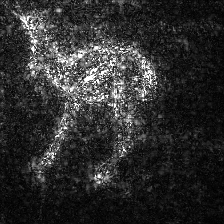

In [6]:
visualize_grayscale(gradients[0])

Let's visualize the effect of noise levels on the smooth gradients method.

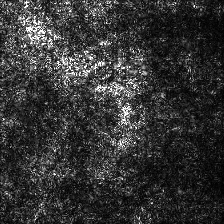

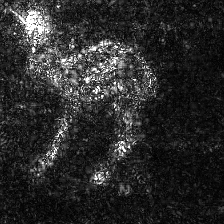

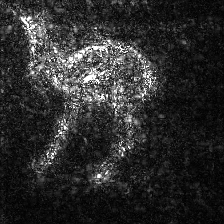

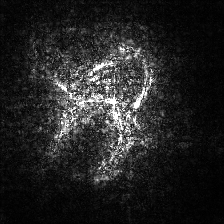

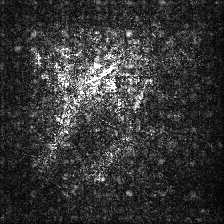

In [7]:
for noise in [0, 0.05, 0.1, 0.3, 0.5]:
    gradients = sg.interpret(
        img_path, 
        noise_amount=noise,
        visual=False, 
        labels=None, 
        save_path=None)
    visualize_grayscale(gradients[0])

Note that `SmoothGradInterpreter` also supports multiple images as inputs. They can be either processed images or a list of image filepaths. Feel free to play around with it!